The task is to predict a target variable named TARGET which contain binary values (0 and 1)

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [194]:
df = pd.read_csv("Week8_train.csv")
df.head()

,id,PARTY_ID,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,...,V_474,V_475,V_476,V_477,V_478,V_479,V_480,V_481,V_482,TARGET
0,0,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.000000,0.0,0.0,0
1,1,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,26.010373,0.0,0.0,0
2,2,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2248.357090,0.0,0.0,1
3,3,NaN,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,2285.146561,0.0,0.0,0
4,4,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,98.395599,0.0,0.0,0


In [195]:
df.describe()

,id,PARTY_ID,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,...,V_474,V_475,V_476,V_477,V_478,V_479,V_480,V_481,V_482,TARGET
count,110899.000000,0.0,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,...,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000,110899.000000
mean,55449.000000,NaN,0.002570,0.022931,0.007791,0.011425,1.235052,0.000090,0.061867,0.372077,...,0.005293,0.002173,0.015834,0.015401,0.793271,0.049928,980.660380,183.764786,59.324373,0.194159
std,32013.928089,NaN,0.058249,0.230278,0.110874,0.107624,2.991882,0.009496,0.304915,1.212413,...,0.082778,0.051003,0.148823,0.193999,1.785113,0.348936,3488.097963,2053.530911,2713.893234,0.395553
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27724.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55449.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83173.500000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1069.611493,0.000000,0.000000,0.000000
max,110898.000000,NaN,7.000000,36.000000,6.000000,3.000000,224.000000,1.000000,7.000000,71.000000,...,11.000000,5.000000,6.000000,11.000000,41.000000,23.000000,382407.611200,213450.998200,308597.646000,1.000000


In [196]:
missing_value = df.isnull().sum()

In [197]:
print(missing_value[missing_value>0])

PARTY_ID    110899
V_301         6331
V_304         1561
V_434         6335
dtype: int64


In [198]:
df_t = pd.read_csv("Week8_test.csv")
df_t.head()

,id,PARTY_ID,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,...,V_473,V_474,V_475,V_476,V_477,V_478,V_479,V_480,V_481,V_482
0,0,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1138.896309,0.0,0.0
1,1,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.0,0.0
2,2,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.0,0.0
3,3,NaN,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,811.539006,0.0,0.0
4,4,NaN,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.0,0.0


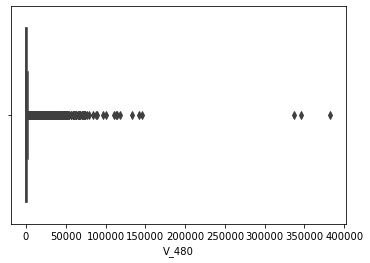

In [199]:
import seaborn as sns
#fig, axs = plt.subplots(1,1,figsize = (10,5))
plt1 = sns.boxplot(df.V_480)
#plt1 = sns.boxplot(df.V_479)

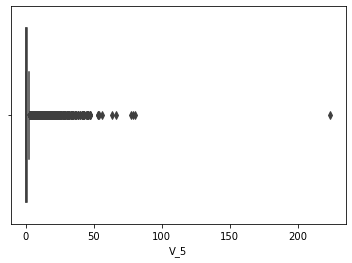

In [200]:
plt2 = sns.boxplot(df.V_5)

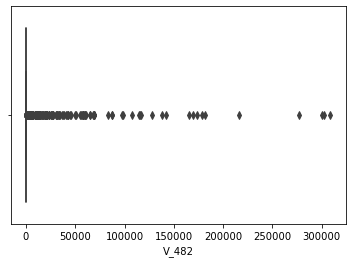

In [201]:
plt3 = sns.boxplot(df.V_482)

In [202]:
cols = ["V_5", "V_482"]
q1 = df[cols].quantile(0.25)
q3 = df[cols].quantile(0.75)
iqr_col = q3 - q1
lwr = q1 - 1.5*iqr_col
upr = q3 - 1.5*iqr_col
df_new = df[(df[cols]>=lwr) & (df[cols]<=upr)]

In [203]:
Q1 = df.V_480.quantile(0.25)
Q3 = df.V_480.quantile(0.75)
iqr = Q3 - Q1
low = Q1 - 1.5*iqr
upp = Q3 + 1.5*iqr
df = df[(df.V_480 >= low) & (df.V_480 <= upp)]

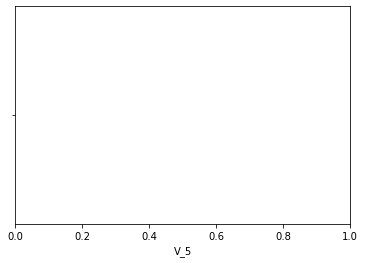

In [204]:
plt4 = sns.boxplot(df_new.V_5)

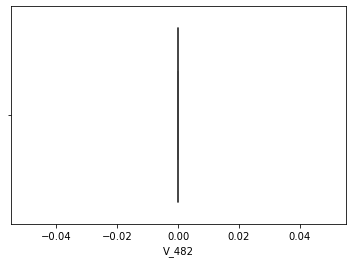

In [205]:
plt5 = sns.boxplot(df_new.V_482)

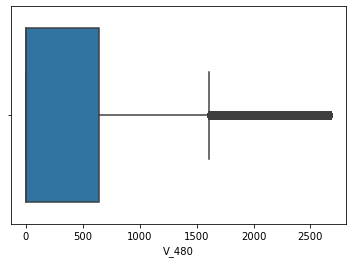

In [206]:
plt1 = sns.boxplot(df.V_480)

In [207]:
missing_value_t = df_t.isnull().sum()

In [208]:
print(missing_value_t[missing_value_t>0])

PARTY_ID    110899
V_301         6205
V_304         1454
V_434         6335
dtype: int64


In [209]:
df.drop("PARTY_ID", axis = 1, inplace= True)

In [210]:
df_t.drop("PARTY_ID", axis = 1, inplace= True)

In [211]:
df['V_301'].fillna(df['V_301'].mode()[0], inplace= True)
df['V_304'].fillna(df['V_304'].mode()[0], inplace= True)
df['V_434'].fillna(df['V_434'].mode()[0], inplace= True)

In [212]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [213]:
df_t.isnull().any().sum()

3

In [214]:
df_t.columns[df_t.isna().any()]

Index(['V_301', 'V_304', 'V_434'], dtype='object')

In [215]:
df_t['V_301'].fillna(df_t['V_301'].mode()[0], inplace= True)
df_t['V_304'].fillna(df_t['V_304'].mode()[0], inplace= True)
df_t['V_434'].fillna(df_t['V_434'].mode()[0], inplace= True)

In [216]:
df_t.columns[df_t.isna().any()]

Index([], dtype='object')

In [217]:
df.shape

(100024, 482)

In [218]:
df_t.shape

(110899, 481)

In [219]:
df.dtypes[df.dtypes == 'object']

V_245    object
V_271    object
V_301    object
V_304    object
V_316    object
V_400    object
V_410    object
V_434    object
dtype: object

In [220]:
df_t.dtypes[df_t.dtypes == 'object']

V_245    object
V_271    object
V_301    object
V_304    object
V_316    object
V_400    object
V_410    object
V_434    object
dtype: object

In [221]:
#df.drop("V_434", axis = 1, inplace= True)

In [222]:
#df_t.drop("V_434", axis = 1, inplace= True)

In [223]:
i =df.V_434.unique()
print(i)

['Aerospace & Defense' 'Food & Staples Retailing'
 'Hotels, Restaurants & Leisure' 'Commercial Banks'
 'Industrial Conglomerates' 'Metals & Mining' 'Construction & Engineering'
 'Diversified Financial Services' 'Airlines' 'Energy Equipment & Services'
 'Health Care Providers & Servic' 'Universities/Colleges'
 'Electrical Equipment' 'Auto Components' 'Household Durables'
 'Multi-Utilities' 'Commercial Services & Supplies'
 'Construction Materials' 'Insurance' 'Chemicals'
 'Oil, Gas & Consumable Fuels' 'Professional Sports' 'Food Products'
 'Beverages' 'Semiconductors & Semiconductor' 'Air Freight & Logistics'
 'Specialty Retail' 'Road & Rail' 'Health Care Equipment & Suppli'
 'Paper & Forest Products' 'Communications Equipment' 'Media'
 'Pharmaceuticals' 'Multiline Retail' 'Leisure Equipment & Products'
 'Electric Utilities' 'Building Products' 'Real Estate Management & Devel'
 'Containers & Packaging' 'Distributors' 'Machinery' 'Household Products'
 'Software' 'Automobiles' 'Computers 

In [224]:
j = df_t.V_434.unique()
print(j)

['Hotels, Restaurants & Leisure' 'Health Care Providers & Servic'
 'Oil, Gas & Consumable Fuels' 'Media' 'Commercial Banks' 'Associations'
 'Indian Bands' 'Pharmaceuticals' 'Computers & Peripherals'
 'Water Utilities' 'Air Freight & Logistics' 'Automobiles'
 'Food & Staples Retailing' 'Aerospace & Defense' 'Road & Rail'
 'Metals & Mining' 'Internet & Catalog Retail'
 'Energy Equipment & Services' 'Religious Associations'
 'Commercial Services & Supplies' 'Food Products' 'Machinery'
 'Industrial Conglomerates' 'Auto Components' 'Chemicals' 'Distributors'
 'Construction & Engineering' 'Multiline Retail' 'Universities/Colleges'
 'Software' 'Legal' 'Internet Software & Services'
 'Paper & Forest Products' 'Building Products' 'Communications Equipment'
 'Diversified Financial Services' 'Registered Charities'
 'Leisure Equipment & Products' 'Federal' 'Personal Products' 'Insurance'
 'Beverages' 'Construction Materials' 'Financial (consulting/accounti'
 'Entertainment(Casinos,Race Tra' 'Healt

In [225]:
l = []
for item in i:
    if item not in j:
        l.append(item)
print(l)

['Real Estate Investment Trusts']


In [226]:
df[df["V_434"] == 'Real Estate Investment Trusts']

,id,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,...,V_474,V_475,V_476,V_477,V_478,V_479,V_480,V_481,V_482,TARGET
5930,5930,0,0,0,0,5,0,0,0,0,...,0,0,0,0,1,0,0.0,0.0,0.0,0
98717,98717,0,0,0,0,3,0,0,0,0,...,0,0,0,0,1,0,0.0,0.0,0.0,1


In [227]:
df.drop([5930, 98717], axis=0, inplace=True)

In [228]:
obj = ["V_245", "V_271", "V_301", "V_304", "V_316", "V_400", "V_410", "V_434"]

In [229]:
df.V_434.value_counts()

Commercial Banks                  13321
Oil, Gas & Consumable Fuels        6332
Metals & Mining                    5528
Diversified Financial Services     4353
Multiline Retail                   3591
                                  ...  
Water Utilities                      13
Health Care Technology                4
Provincial                            3
Internet & Catalog Retail             2
Libraries                             1
Name: V_434, Length: 84, dtype: int64

In [230]:
df_t.V_434.value_counts()

Commercial Banks                  14806
Oil, Gas & Consumable Fuels        7035
Metals & Mining                    6009
Diversified Financial Services     4757
Multiline Retail                   4155
                                  ...  
Water Utilities                      11
Internet & Catalog Retail             5
Libraries                             5
Provincial                            4
Health Care Technology                3
Name: V_434, Length: 84, dtype: int64

In [231]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('enc', OneHotEncoder(categories='auto',handle_unknown='ignore'), obj)], remainder= 'passthrough')

xt = ct.fit_transform(df[obj]).toarray()

df_encd = pd.DataFrame(xt, index= df.index)
df_other_cols = df.drop(columns= obj)
df_n = pd.concat([df_other_cols, df_encd], axis= 1)

In [232]:
#df_n = pd.get_dummies(df, columns= obj)

In [233]:
df_n.shape

(100022, 592)

In [234]:
xt_t = ct.fit_transform(df_t[obj]).toarray()

df_encd_t = pd.DataFrame(xt_t, index= df_t.index)
df_other_cols_t = df_t.drop(columns= obj)
df_tn = pd.concat([df_other_cols_t, df_encd_t], axis= 1)

In [235]:
#df_tn = pd.get_dummies(df_t, columns = obj)

In [236]:
df_tn.shape

(110899, 591)

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
y = df_n.TARGET
X = df_n.drop(["TARGET"], axis =1)

In [239]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size= 0.5, random_state= 42)

In [240]:
from sklearn.metrics import classification_report

In [241]:
from sklearn.metrics import f1_score
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f1_score(y_test, preds, average= "macro"))

In [242]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
#score(log, "Logistic Regression")

In [243]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
#score(dt, "Decision Tree")

In [244]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
#score(rf, "Random Forest")

In [245]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p =2)
#score(knn, "KNeighbors")

In [246]:
from sklearn.naive_bayes import GaussianNB
g = GaussianNB()
#score(g, "Gausian")

In [247]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
#score(gbc, "Gradient Boosting")

In [248]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier()
#score(hgbc, "Histogram Gradient Boosting")

In [249]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
#score(xgb, "XGBoost")

In [250]:
from catboost import CatBoostClassifier
#catb = CatBoostClassifier(verbose= 0, n_estimators= 100)
#score(catb, "CatBoost")

In [251]:
#target = catb.predict(df_tn)
d = pd.DataFrame(target)
d.index = df_tn.id
d.columns = ['TARGET']
d.to_csv('submission_final.csv', index= True)

In [252]:
d.head()

,TARGET
id,
0,0
1,0
2,0
3,0
4,0
